# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [ ]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# считываем основной датафрейм
data = pd.read_csv('LINK', sep='\t')

In [ ]:
# выведем часть даты с помощью команды head()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
# выведем основную информацию о дате и её структурах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Первое, что бросается в глаза - отсутствует тип bool там, где он нужен (например, переменная is_apartment вообще была считана как object). 2 - Наличие пропусков данных, особенно много в булевых переменных (где должны быть true/false)

<Axes: >

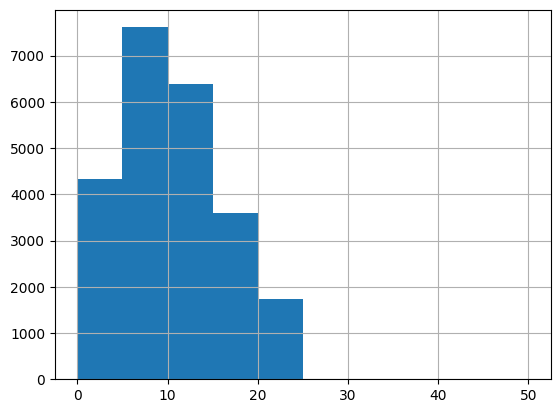

In [ ]:
# посмотрим на распределение картинок
data['total_images'].hist()

C ним всё в порядке

<Axes: >

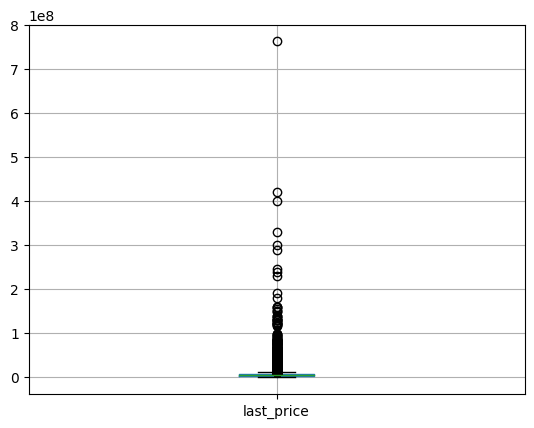

In [ ]:
# посмотрим на боксплот цены на момент снятия объявления в публикации
data.boxplot('last_price')

Здесь отчётливо видны выбросы, фиксируем, что с ними нужно поработать.

<Axes: >

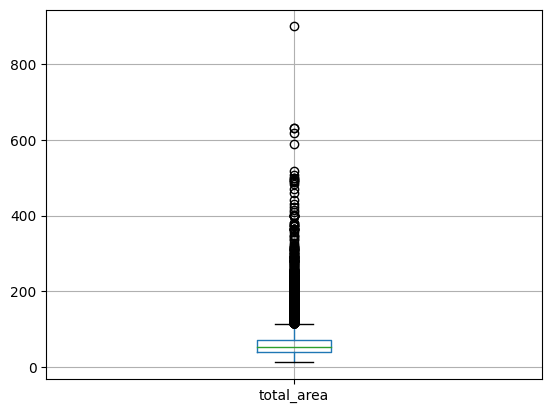

In [ ]:
# Посмотрим на боксплот общей площади квартир
data.boxplot('total_area')

Заметим, что подавляющая часть значений лежит в диапазоне до 100 квадратов, и есть много выбросов по метражу. Особенно беспокоят значения больше 400, стоит разобраться что это за помещения.

In [ ]:
# Ранее было отмечено, что в проекте есть много пропусков, посмотрим, сколько их наблюдается в графе высоты потолка
data['ceiling_height'].isna().sum()

9195

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

<Axes: >

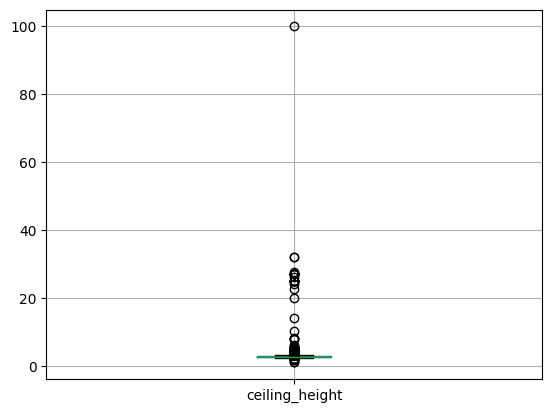

In [ ]:
data.boxplot('ceiling_height')

Заметим, что есть очень много пропусков и есть значения, предположительно, выделяющиеся от общей картины. К примеру, 100. Безусловно, высота потолка в 100 метров явно отличается от обывательского восприятия данного значения.

<Axes: >

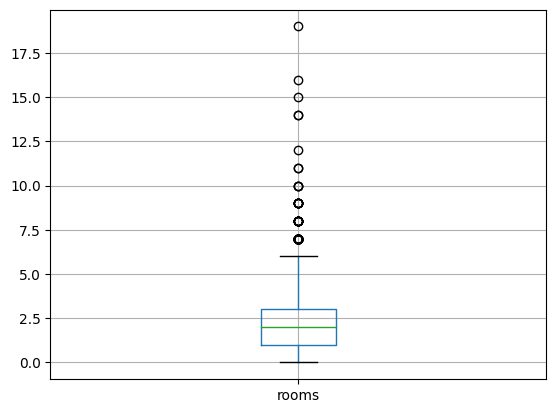

In [ ]:
# Выведем боксплот по комнатам
data.boxplot('rooms')

Распределение выглядит нормальным, но есть выбросы. Сложно предположить даже складское помещение с 15-ю комнатами.

<Axes: >

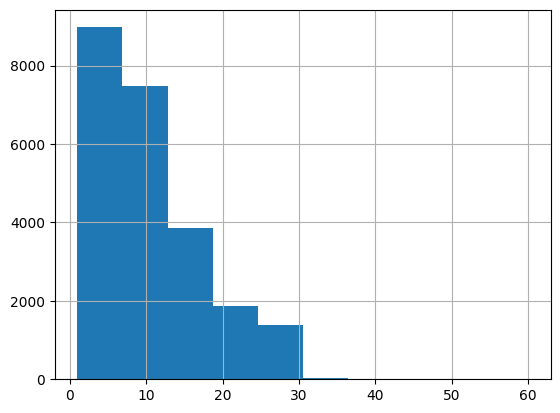

In [ ]:
# Посмотрим на распределение этажей
data['floors_total'].hist()

In [ ]:
data['floors_total'].isna().sum()

86

С распределением всё в порядке, пропусков немного.

<Axes: >

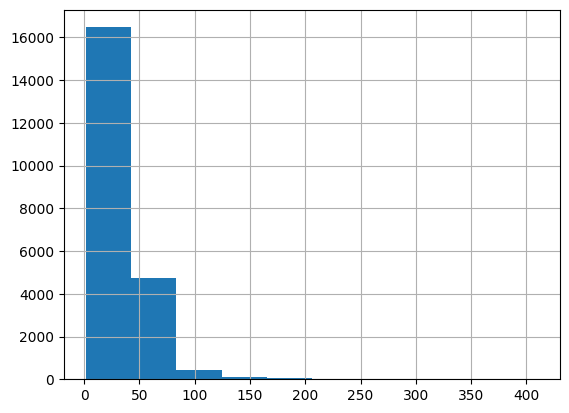

In [ ]:
# Посмотрим на распределение жилой площади в кв. м.
data['living_area'].hist()

In [ ]:
data['living_area'].isna().sum()

1903

Распределение в порядке, но пропусков много. Их сложно заменить.

<Axes: >

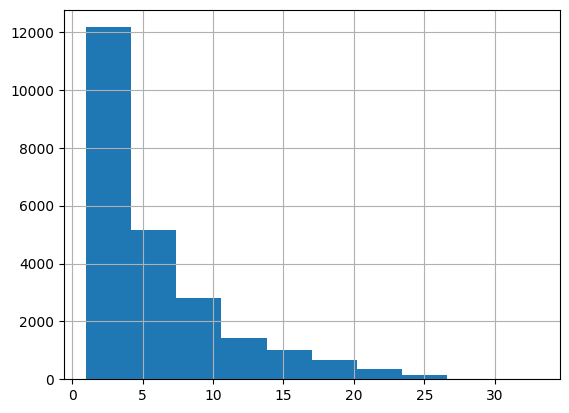

In [ ]:
# Посмотрим на распределение этажа, на котором расположено помещение
data['floor'].hist()

Всё в порядке

<Axes: >

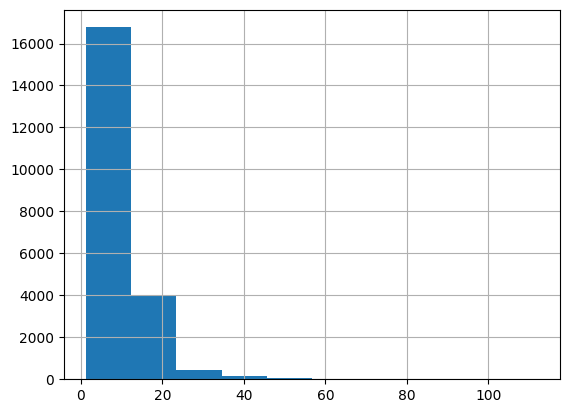

In [ ]:
# посмотрим на распределение пдощадей кухни
data['kitchen_area'].hist()

Выбросов много, но их никак не заменить.

<Axes: >

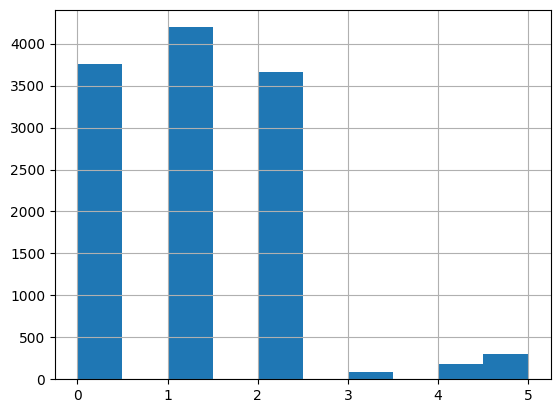

In [ ]:
# Посмотрим на распределение количества балконов
data['balcony'].hist()

Выбросов нет, пропуски в данном случае можно заменить на 0.

### Выполните предобработку данных

В первую очередь, поработаем с ценой. Создадим категории цен с помощью функции и этой функцией пройдёмся но датафрейму.

In [ ]:
def price_cat(row):
    if row['last_price'] <= 200000:
        return 'sus_low'
    elif 200000 < row['last_price'] <= 2000000:
        return 'cheap'
    elif 2000000 < row['last_price'] <= 4000000:
        return 'normal_low'
    elif 4000000  < row['last_price'] <= 8000000:
        return 'normal'
    elif 8000000  < row['last_price'] <= 12000000:
        return 'normal_high'
    elif 12000000  < row['last_price'] <= 50000000:
        return 'expencive'
    elif row['last_price'] > 50000000:
        return 'sus_high'

In [ ]:
data['price_cat'] = data.apply(price_cat, axis=1)
data.groupby('price_cat')['price_cat'].count()

price_cat
cheap           1450
expencive       1810
normal         10409
normal_high     2254
normal_low      7644
sus_high         131
sus_low            1
Name: price_cat, dtype: int64

Подозрительно низких значений почти нет, высокие есть, но их не так много. Можно с лёкгостью избавиться от них.

In [ ]:
good_data = data[(data['price_cat'] != 'sus_high') & (data['price_cat'] != 'sus_low')]
good_data.groupby('price_cat')['price_cat'].count()

price_cat
cheap           1450
expencive       1810
normal         10409
normal_high     2254
normal_low      7644
Name: price_cat, dtype: int64

Теперь всё отлично. Далее посмотрим распределение общей жилой площади.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

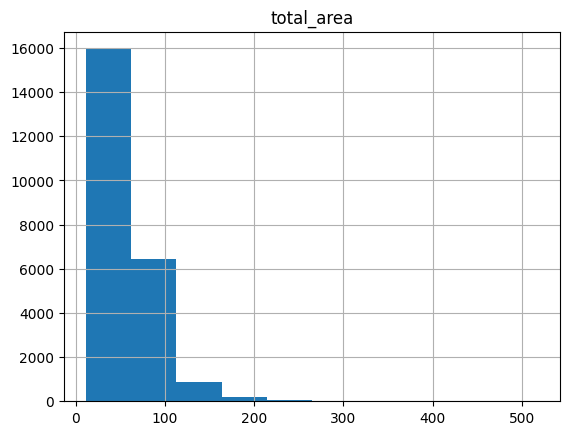

In [ ]:
good_data.hist('total_area')

После удаления ненужных значений по цене здесь пропали выбросы с большим метражом.

Далее разберёмся с потолками и их высотой. В первую очередь, стоит понять, что нам нужно убрать. Посмотрим, сколько есть квартир, высота потолков которых не превышает 2,4 метра.

In [ ]:
good_data.loc[good_data['ceiling_height'] < 2.4, 'ceiling_height'].count()

29

Их не так много, просто уберём с помощью тильды. Делаю так специально, чтобы случайно не отбросить пропущенные значения.

In [ ]:
good_data = good_data[~(good_data['ceiling_height'] < 2.4)]
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23538 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23538 non-null  int64  
 1   last_price            23538 non-null  float64
 2   total_area            23538 non-null  float64
 3   first_day_exposition  23538 non-null  object 
 4   rooms                 23538 non-null  int64  
 5   ceiling_height        14386 non-null  float64
 6   floors_total          23452 non-null  float64
 7   living_area           21654 non-null  float64
 8   floor                 23538 non-null  int64  
 9   is_apartment          2754 non-null   object 
 10  studio                23538 non-null  bool   
 11  open_plan             23538 non-null  bool   
 12  kitchen_area          21283 non-null  float64
 13  balcony               12100 non-null  float64
 14  locality_name         23489 non-null  object 
 15  airports_nearest      18

Теперь посмотрим, что из себя представляют квартиры, высота которых больше 3-х мтеров.

In [ ]:
good_data[(good_data['ceiling_height'] > 3)].groupby('price_cat')['price_cat'].count()


price_cat
cheap            5
expencive      496
normal         454
normal_high    424
normal_low      59
Name: price_cat, dtype: int64

Дешевые и недорогие варианты лучше тоже заменить медианным значением:



In [ ]:
good_data.loc[(good_data['ceiling_height'] > 3) & ((good_data['price_cat'] == 'cheap') | (good_data['price_cat'] == 'normal_low')), 'ceiling_height'] = \
good_data['ceiling_height'].median()

Заменим пропуски для общего количества этажей

In [ ]:
good_data[good_data['floors_total'].isna()]['floor'].unique()

array([ 4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10])

Заменим на True тип апартаментов в пропущенных ячейках, руководствуясь здравым смыслом и структурой данных.

In [ ]:
good_data['is_apartment'] = good_data['is_apartment'].fillna(True)
good_data['is_apartment'].isna().sum()

0

Таже поменяем тип `is_apartment` на bool


In [ ]:
good_data['is_apartment'] = good_data['is_apartment'].astype(bool)
good_data['is_apartment'].dtypes

dtype('bool')

Заменим пропуски с балконами

In [ ]:
good_data['balcony'] = good_data['balcony'].fillna(0)
good_data['balcony'].isna().sum()

0

In [ ]:
good_data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [ ]:
good_data.groupby('balcony')['balcony'].count()

balcony
0.0    15163
1.0     4165
2.0     3647
3.0       80
4.0      181
5.0      302
Name: balcony, dtype: int64

Логично предположить, что пустые значения => отстутствие балкона

Поработаем с названиями населённых пунктов

In [ ]:
good_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
good_data['locality_name'].isna().sum()

49

In [ ]:
good_data = good_data.dropna(subset=['locality_name']).reset_index(drop=True)
good_data['locality_name'].isna().sum()

0

Ещё раз просмотрел дупликаты, их нет. Поскольку объектов без локации не так много, их можно убрать.

In [ ]:
good_data['year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year

NameError: name 'pd' is not defined

In [ ]:
good_data['month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month

Проверим гипотезу о том, что пустые значения значат, что объявление все ещё активно

In [ ]:
good_data[good_data['days_exposition'].isna()].groupby('year')['year'].count()

year
2014      18
2015      68
2016      65
2017     268
2018     947
2019    1783
Name: year, dtype: int64

In [ ]:
good_data[good_data['year'] == 2019]['month'].unique()

array([3, 4, 1, 2, 5], dtype=int32)

База данных заполнялась до мая 2019 года. Пока что, видим, что в 2018 есть много активных объявлений. Посмотрим процентное соотношение, чтобы быть уверенными.

In [ ]:
good_data[good_data['days_exposition'].isna()].groupby('year')['year'].count() \
/ good_data.groupby('year')['year'].count()

year
2014    0.135338
2015    0.059079
2016    0.023714
2017    0.032964
2018    0.111767
2019    0.623209
Name: year, dtype: float64

В 2014 году подозрительно высокий процент пропусков, а вот в 2018 и 2019 году, похоже, действительно пустые значения значат, что объявление еще актуально.

Также поработаем с форматами данных

In [ ]:
good_data['last_price'] = good_data['last_price'].astype(int)
good_data.loc[good_data['floors_total'].isna() == False, 'floors_total'] = \
good_data.loc[good_data['floors_total'].isna() == False, 'floors_total'].astype(int)
good_data.loc[good_data['balcony'].isna() == False, 'balcony'] = \
good_data.loc[good_data['balcony'].isna() == False, 'balcony'].astype(int)
good_data.loc[good_data['airports_nearest'].isna() == False, 'airports_nearest'] = \
good_data.loc[good_data['airports_nearest'].isna() == False, 'airports_nearest'].astype(int)
good_data.loc[good_data['cityCenters_nearest'].isna() == False, 'cityCenters_nearest'] = \
good_data.loc[good_data['cityCenters_nearest'].isna() == False, 'cityCenters_nearest'].astype(int)
good_data.loc[good_data['parks_around3000'].isna() == False, 'parks_around3000'] = \
good_data.loc[good_data['parks_around3000'].isna() == False, 'parks_around3000'].astype(int)
good_data.loc[good_data['parks_nearest'].isna() == False, 'parks_nearest'] = \
good_data.loc[good_data['parks_nearest'].isna() == False, 'parks_nearest'].astype(int)
good_data.loc[good_data['ponds_around3000'].isna() == False, 'ponds_around3000'] = \
good_data.loc[good_data['ponds_around3000'].isna() == False, 'ponds_around3000'].astype(int)
good_data.loc[good_data['ponds_nearest'].isna() == False, 'ponds_nearest'] = \
good_data.loc[good_data['ponds_nearest'].isna() == False, 'ponds_nearest'].astype(int)

### Добавьте в таблицу новые столбцы

Месяц уже добавили, сделаем всё остальное по порядку

In [ ]:
# Добавляем цену за кв. м.
good_data['m^2_price'] = good_data['last_price'] / good_data['total_area']


In [ ]:
# добавляем день
good_data['day'] = pd.DatetimeIndex(good_data['first_day_exposition']).day
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_cat,year,month,cityCenter_km,m^2_price,day
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,expencive,2019,3,16.028,120370.370370,7
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,normal_low,2018,12,18.603,82920.792079,4
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,normal,2015,8,13.933,92785.714286,20
3,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,normal_high,2018,6,8.098,100000.000000,19
4,10,2890000,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,True,...,NaN,NaN,NaN,55.0,normal_low,2018,9,NaN,95065.789474,10


In [ ]:
# функцией добавим тип этажа
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

good_data['floor_cat'] = good_data.apply(floor_cat, axis=1)

In [ ]:
# также добавим расстояние до центра в км.
good_data['cityCenter_km'] = good_data['cityCenters_nearest'] / 1000

### Проведите исследовательский анализ данных

In [ ]:
# ещё раз изучим параметры данных, уже отредактированных
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23489 non-null  int64  
 1   last_price            23489 non-null  int64  
 2   total_area            23489 non-null  float64
 3   first_day_exposition  23489 non-null  object 
 4   rooms                 23489 non-null  int64  
 5   ceiling_height        14372 non-null  float64
 6   floors_total          23404 non-null  float64
 7   living_area           21610 non-null  float64
 8   floor                 23489 non-null  int64  
 9   is_apartment          23489 non-null  bool   
 10  studio                23489 non-null  bool   
 11  open_plan             23489 non-null  bool   
 12  kitchen_area          21243 non-null  float64
 13  balcony               23489 non-null  float64
 14  locality_name         23489 non-null  object 
 15  airports_nearest   

Посмотрим на наблюдения по параментрам, согласно заданию.

<Axes: >

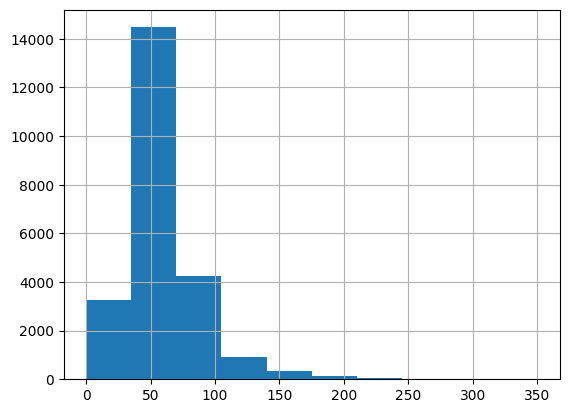

In [ ]:
# опишем общую пдощадь
good_data['total_area'].hist(bins=10, range=(0,350))

In [ ]:
good_data['total_area'].mean()

59.22638724509344

In [ ]:
good_data['total_area'].median()

52.0

В целом, подобное распределение выглядит правдоподобным с бытового смысла. Медиана и среднее развличаются совсем незначительно.

<Axes: >

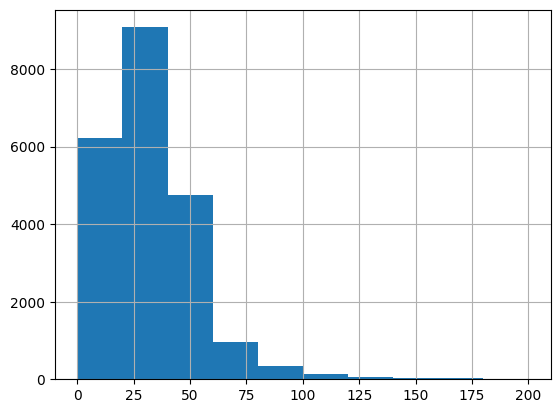

In [ ]:
# Далее опишем жилую площадь
good_data['living_area'].hist(bins=10, range=(0,200))

In [ ]:
good_data['living_area'].mean()

33.86268725173531

In [ ]:
good_data['living_area'].median()

30.0

В данном случае, ситуация схожая с общей площадью. Существенных "выбросов" нет, меры центральной тенденции почти сходятся.

<Axes: >

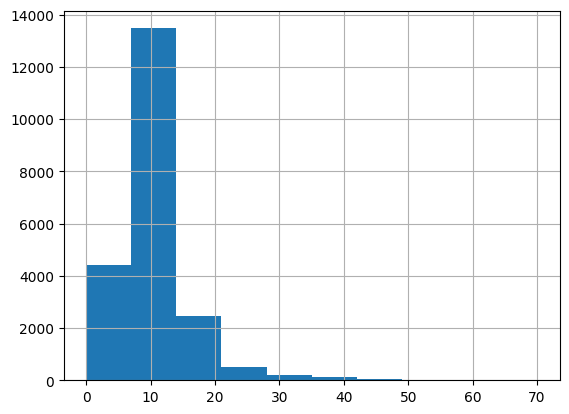

In [ ]:
# Разберёмся с площадью кухни
good_data['kitchen_area'].hist(bins=10, range=(0,70))

In [ ]:
good_data['kitchen_area'].mean()

10.441688085486984

In [ ]:
good_data['kitchen_area'].median()

9.1

Идентично для площади кухни

<Axes: >

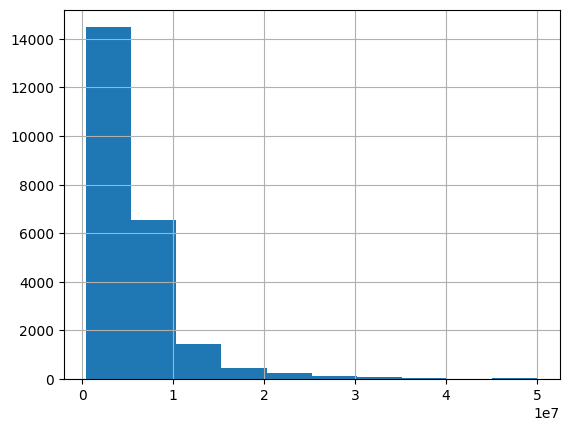

In [ ]:
# цена объекта
good_data['last_price'].hist(bins=10)

In [ ]:
good_data['last_price'].mean()


6001113.674230491

In [ ]:
good_data['last_price'].median()

4600000.0

Судя по графику, подавляющее большинство квартир входят в категорию стоимости до 10млн. Тоже все логично. Вид распределения ближе к Пуассоновскому. Наличие разброса среди двух мер центральной тенденции очень просто объясняется статистически - большое количество дорогих квартир сдвигают среднее значение. Поэтому, в качестве рекомендации для принятия решения аналитику лучше указать на медианное значение

<Axes: >

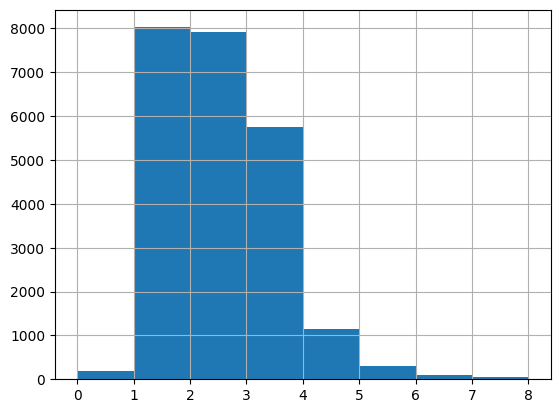

In [ ]:
# для количества комнат
good_data['rooms'].hist(bins=8, range=(0,8))

In [ ]:
good_data['rooms'].mean()

2.0561539443995063

In [ ]:
good_data['rooms'].median()

2.0

Точно так же вписывается в обычные представления о квартирах. Распределение Пуассона, среднее и медиана близки - выбросов почти нет.

<Axes: >

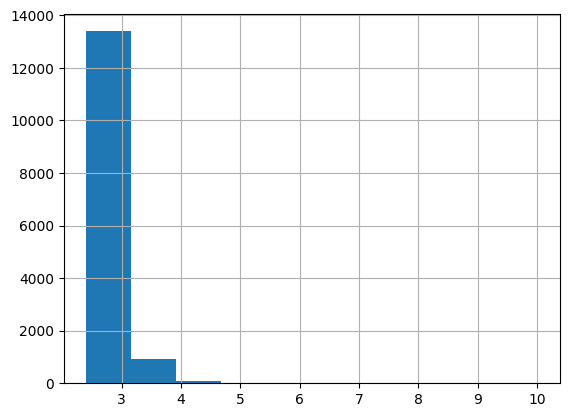

In [ ]:
# для высоты потолков
good_data['ceiling_height'].hist()

In [ ]:
good_data['ceiling_height'].mean()

2.7196541887002503

In [ ]:
good_data['ceiling_height'].median()

2.65

С высотой потолков тоже всё хорошо. Единственное, на чём тут стоит акцентировать внимание - я решил не убирать слишком большие значения: есть вероятность, что это либо ангары, либо складские помещения в ЖК, в любом случае, для более углоубленного анализа эти значения будут релевантны.

<Axes: >

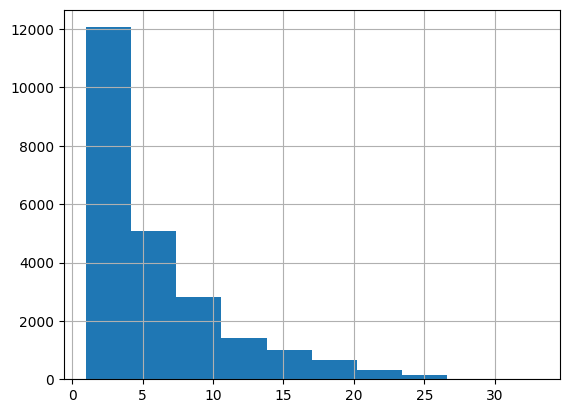

In [ ]:
# для этажей
good_data['floor'].hist()

In [ ]:
good_data['floor'].median()

4.0

In [ ]:
good_data['floor'].mean()

5.895993869470816

Распределение похоже на Пуассоновское, всё нормально, так как даже разница между средним и медианой не является основополагающим в контексте остутствия конкретной задачи и при отсутствии гипотез, связанных с этим индикатором.

<Axes: >

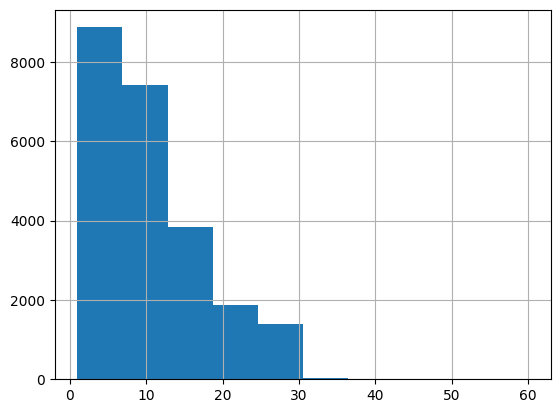

In [ ]:
# для общего количества этажей в доме
good_data['floors_total'].hist()

In [ ]:
good_data['floors_total'].mean()

10.695393949752178

In [ ]:
good_data['floors_total'].median()

9.0

Также Пуассоновское распределение. Медиана в классике российских реалий - большинство девятиэтажек.

<Axes: >

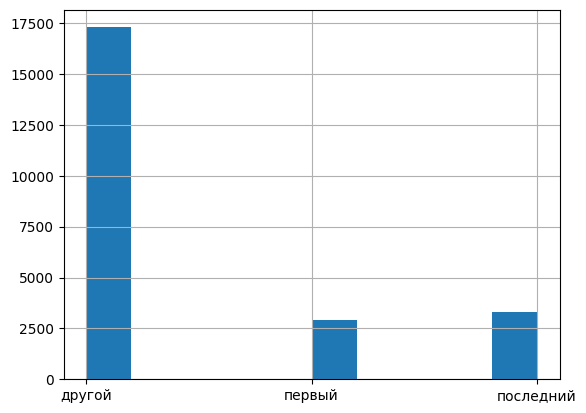

In [ ]:
# для этажей
good_data['floor_cat'].hist()

Тут тоже всё в порядке

<Axes: >

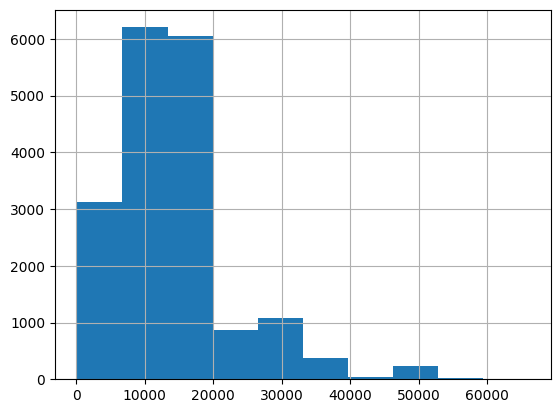

In [ ]:
# для расстояния до центра города
good_data['cityCenters_nearest'].hist()

In [ ]:
good_data['cityCenters_nearest'].mean()

14266.473271838186

In [ ]:
good_data['cityCenters_nearest'].median()

13149.0

Данные абсолютно логичны. Подавляющее большинство в диапазоне до 13 км. Как от стандартного спальника до центра. Все что за пределами 20км - Ленобласть. Площадь СПб 1400км^2, отсюда корень ~ 40, значит, радиус как раз в районе 20. Характер распределения нестандартный из-за четкого деления на город и область

<Axes: >

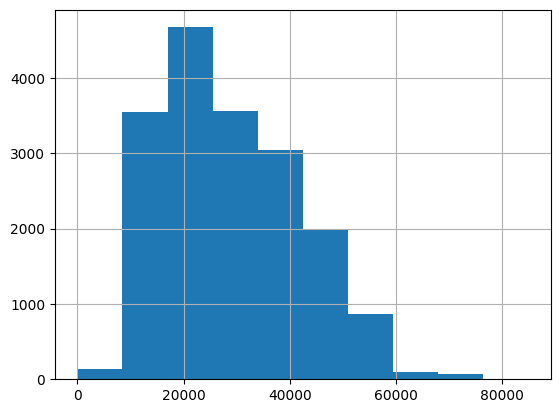

In [ ]:
# для расстояния до аэропорта
good_data['airports_nearest'].hist()

In [ ]:
good_data['airports_nearest'].mean()

28818.51716272601

In [ ]:
good_data['airports_nearest'].median()

26770.0


Выглядит адекватно. Также похоже на распределение Пуассона

<Axes: >

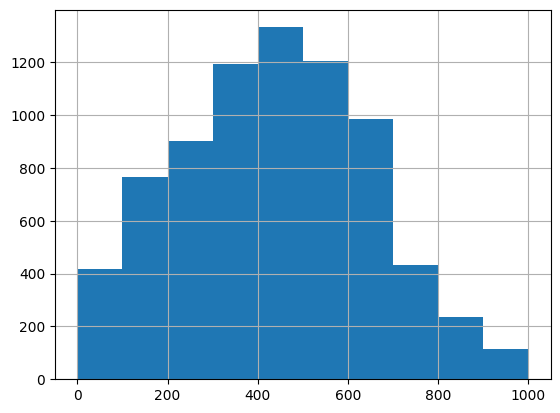

In [ ]:
# для парков поблизости, масштабируем график
good_data['parks_nearest'].hist(range=(0,1000))

In [ ]:
good_data['parks_nearest'].mean()

492.1420311714429

In [ ]:
good_data['parks_nearest'].median()

456.0

Масштабировал до 1000, потому что дальше данных мало. Почти классическое нормальное распределение. Двигаемся дальше



<Axes: >

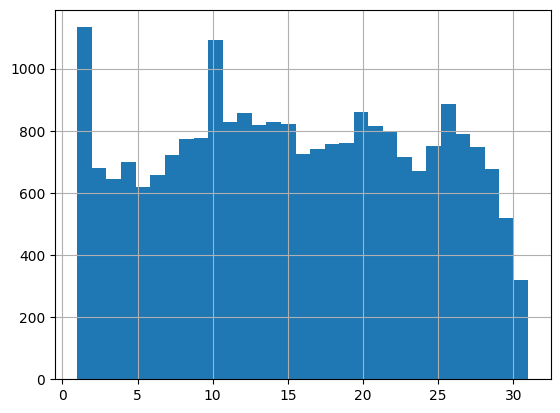

In [ ]:
good_data['day'].hist(bins=31)

In [ ]:
good_data['day'].mean()

15.467708288986334

In [ ]:
good_data['day'].median()

15.0

Похоже на реальность. Резкие пики 1 и 10 числа могут быть связаны с тем, что это даты регулярной публикации для агенств. Спад под конец очевиден -- не во всех месяцах есть 31 день. Среднее - середина месяца. Как раз и говорит о том, что в целом нет особого различия по датам

<Axes: >

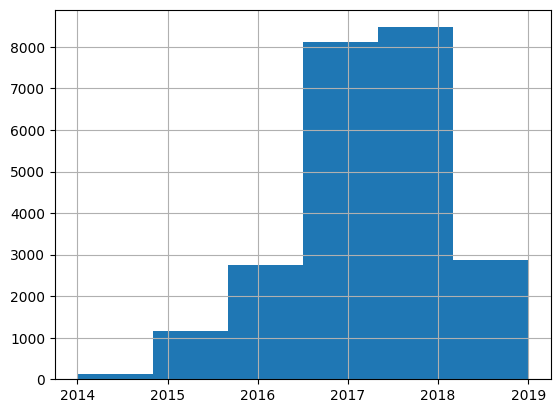

In [ ]:
good_data['year'].hist(bins=6)

In [ ]:
good_data['year'].mean()

2017.372642513517

In [ ]:
good_data['year'].median()

2017.0

В первые года объявлений совсем мало, именно поэтому среднее сдвинулось вниз от медианы

<Axes: >

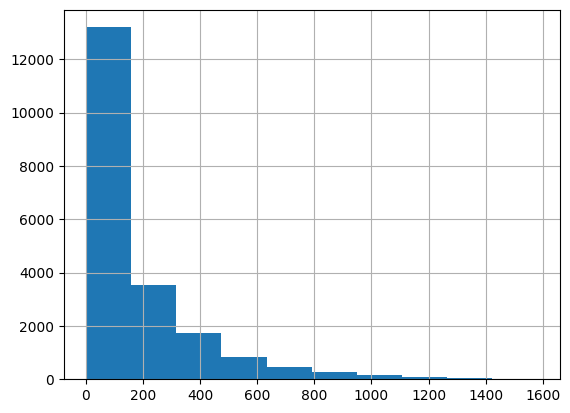

In [ ]:
good_data['days_exposition'].hist()

<Axes: >

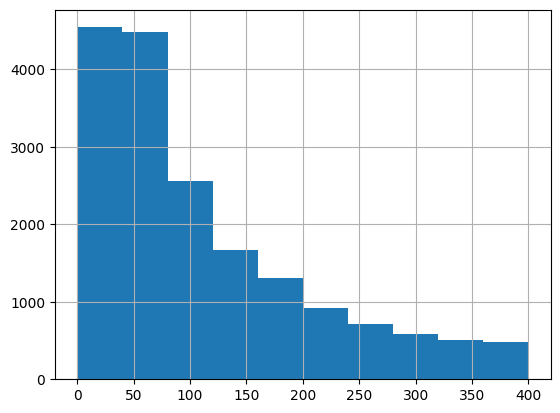

In [ ]:
good_data['days_exposition'].hist(range=(0, 400))

In [ ]:
good_data['days_exposition'].mean()

180.0461651917404

In [ ]:
good_data['days_exposition'].median()

95.0

In [ ]:
good_data['days_exposition'].median() / 2

47.5

Как раз полтора месяца 1 квартиль

In [ ]:
good_data['days_exposition'].median() + good_data['days_exposition'].median() / 2

142.5

5.5 месяцев

Быстрая продажа => месяц-два Необычайно долгая => больше полугода



Визуализируем

<Axes: xlabel='total_area', ylabel='last_price'>

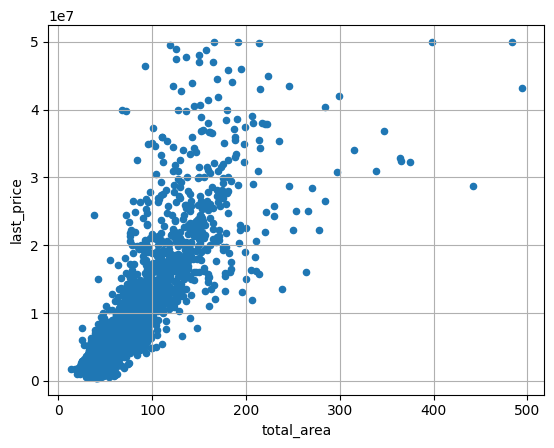

In [ ]:
(good_data
    .pivot_table(index='last_price', values='total_area').reset_index()
    .plot(x='total_area', y='last_price', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='last_price', values='total_area').reset_index().corr()

,last_price,total_area
last_price,1.000000,0.820148
total_area,0.820148,1.000000


Очевидна линейная зависимость с несколькими выбросами для большой площади. Высокий индекс корреляции это только подтверждает

<Axes: xlabel='living_area', ylabel='last_price'>

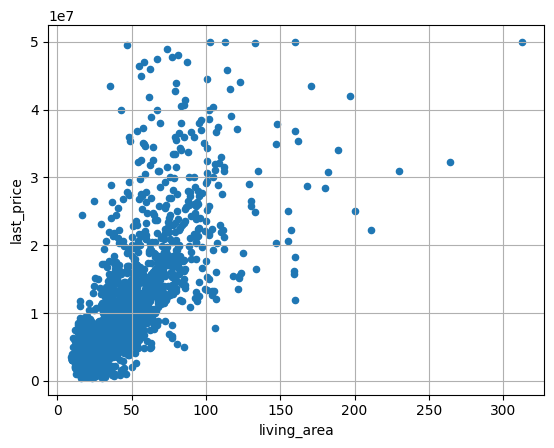

In [ ]:
(good_data
    .pivot_table(index='last_price', values='living_area').reset_index()
    .plot(x='living_area', y='last_price', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='last_price', values='living_area').reset_index().corr()

,last_price,living_area
last_price,1.0000,0.7472
living_area,0.7472,1.0000


В районе 25м жилой площади можно увидеть, что точки выстраиваются в вертикальную полоску. Это может быть связано с заполнением пропусков медианной величиной. Коэффициент корреляции все еще высокий

<Axes: xlabel='kitchen_area', ylabel='last_price'>

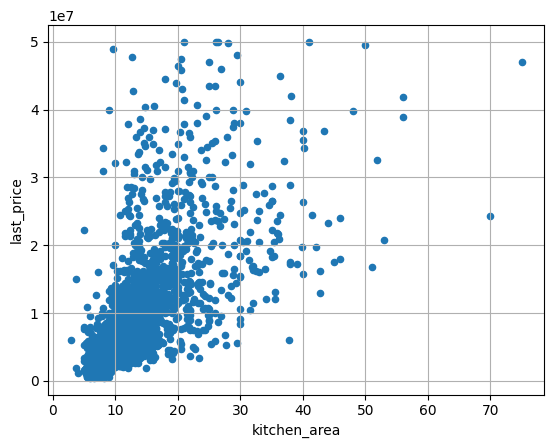

In [ ]:
(good_data
    .pivot_table(index='last_price', values='kitchen_area').reset_index()
    .plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='last_price', values='kitchen_area').reset_index().corr()

,last_price,kitchen_area
last_price,1.000000,0.656441
kitchen_area,0.656441,1.000000


Практически аналогичная зависимость. Естественно, что они будут совпадать, т.к. величины жилой общей и кухонной площадей соотносятся друг с другом. К-т корреляции пониже. Скорее всего это связано с тем, что с увеличением общей площади квартиры, кухня не настолько сильно растет

<Axes: xlabel='rooms', ylabel='last_price'>

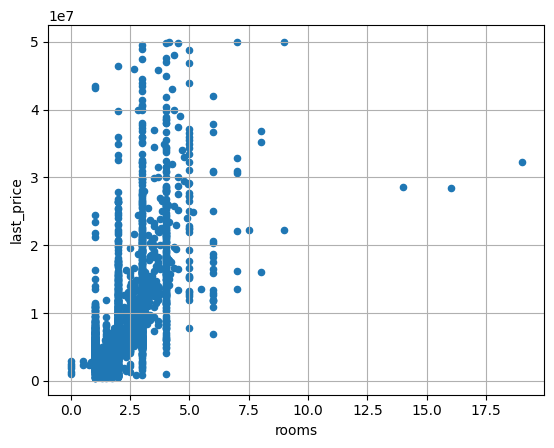

In [ ]:
(good_data
    .pivot_table(index='last_price', values='rooms').reset_index()
    .plot(x='rooms', y='last_price', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='last_price', values='rooms').reset_index().corr()

,last_price,rooms
last_price,1.000000,0.619236
rooms,0.619236,1.000000


Также видим отчетливую линейную зависимость. Полоски связаны с тем, что количество комнат дискретно. Линейная зависимость также похожа на зависимость от площади, потому что количество комнат будет с ней коррелировать

<Axes: xlabel='rooms', ylabel='total_area'>

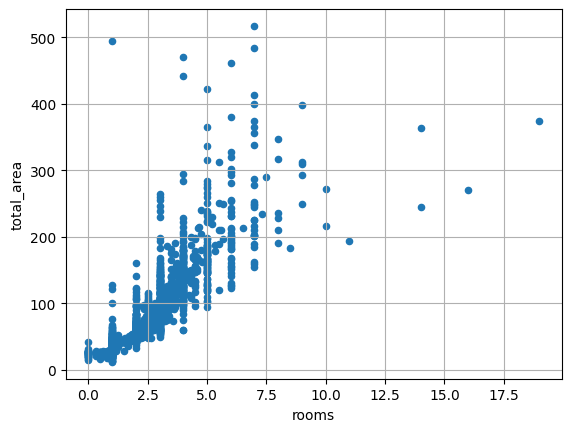

In [ ]:
(good_data
    .pivot_table(index='total_area', values='rooms').reset_index()
    .plot(x='rooms', y='total_area', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='total_area', values='rooms').reset_index().corr()

,total_area,rooms
total_area,1.000000,0.834646
rooms,0.834646,1.000000


Действительно, количество комнат напрямую связано с метражом.



<Axes: xlabel='floor_cat'>

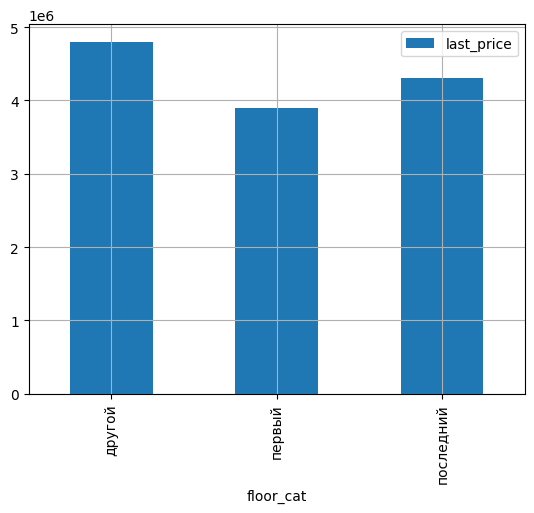

In [ ]:
(good_data
    .pivot_table(index='floor_cat', values='last_price', aggfunc='median').reset_index()
    .plot(x='floor_cat', y='last_price', kind='bar', grid=True)
)

Никто не хочет квартиру на последнем и особенно на первом этаже. Корреляцию здесь искать нет смысла даже чисто статистически.

<Axes: xlabel='day', ylabel='last_price'>

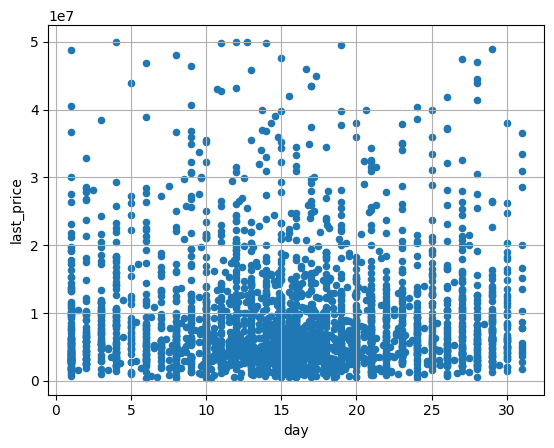

In [ ]:
(good_data
    .pivot_table(index='last_price', values='day').reset_index()
    .plot(x='day', y='last_price', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='last_price', values='day').reset_index().corr()

,last_price,day
last_price,1.000000,0.011455
day,0.011455,1.000000


Корреляции не должно было быть тут. Матрица это тоже подтверждает



<Axes: xlabel='month', ylabel='last_price'>

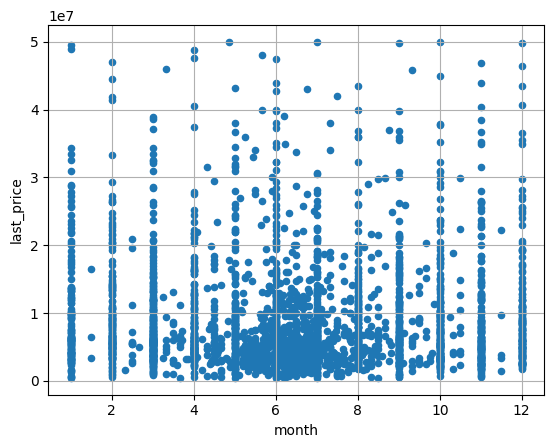

In [ ]:
(good_data
    .pivot_table(index='last_price', values='month').reset_index()
    .plot(x='month', y='last_price', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='last_price', values='month').reset_index().corr()

,last_price,month
last_price,1.000000,0.002413
month,0.002413,1.000000


С месяцем все аналогично. Никакой корреляции.

<Axes: xlabel='year', ylabel='last_price'>

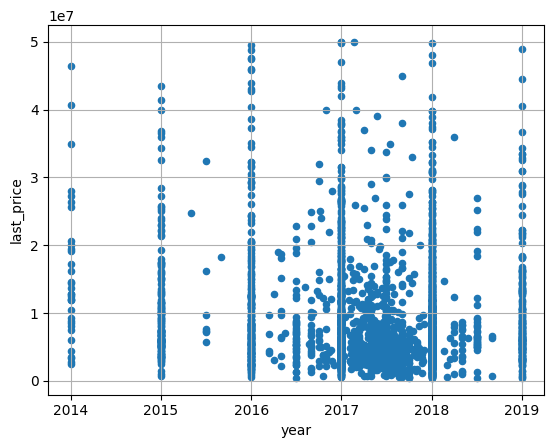

In [ ]:
(good_data
    .pivot_table(index='last_price', values='year').reset_index()
    .plot(x='year', y='last_price', kind='scatter', grid=True)
)

In [ ]:
good_data.pivot_table(index='last_price', values='year').reset_index().corr()

,last_price,year
last_price,1.000000,-0.106031
year,-0.106031,1.000000


А вот с годом можно увидеть незначительную отрицательную корреляцию.

In [ ]:
good_data['m^2'] = good_data['last_price'] / good_data['total_area']
good_data = good_data[good_data['m^2'] < 400000]

In [ ]:
(good_data
 .pivot_table(index='locality_name', values='m^2', aggfunc=['count', 'mean'])
 .sort_values(by=('count', 'm^2'), ascending=False).head(10)
)

,count,mean
,m^2,m^2
locality_name,,
Санкт-Петербург,15561,111773.511669
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,396,67275.625879
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763


<Axes: xlabel='cityCenter_km', ylabel='m^2'>

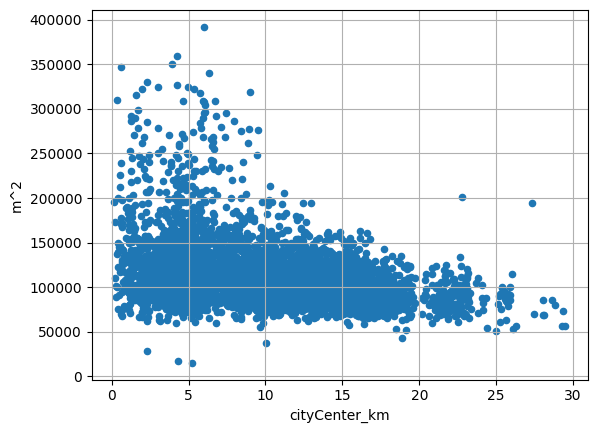

In [ ]:
(good_data[good_data['locality_name'] == 'Санкт-Петербург']
    .pivot_table(index='cityCenter_km', values='m^2').reset_index()
    .plot(x='cityCenter_km', y='m^2', kind='scatter', grid=True)
)

In [ ]:
(good_data[good_data['locality_name'] == 'Санкт-Петербург']
    .pivot_table(index='cityCenter_km', values='m^2').reset_index()
    .corr()
)

,cityCenter_km,m^2
cityCenter_km,1.000000,-0.372031
m^2,-0.372031,1.000000


### Напишите общий вывод

После выполнения проекта усвоил работу с пропусками. Главное, что чаще всего заgjлнить их нельзя. И с данными с пропусками тоже можно делать анализ.

База данных в проекте была очень опрятная, за исключением отсутствия информации о высоте потолков и иных индикаторов, заполняемых пользователем (но ранее это оговаривалось в условиях). Все остальные параметры были распределены либо нормально, либо по Пуассона.

Поиск линейных зависимостей в данных подтвердил общеизвестные рациональные соображения:



*   сильнее всего цена квартиры связана с общим метражом
*   метражи жилплощади и кухни тоже влияют, но не так сильно
*   есть зависимость от количества комнат (но она полностью обусловлена связью с общим метражом)
*   цена ниже для квартир на последнем, и особенно на первом этажах
*   стоимость не зависит от дня и месяца публикации
*   с годами цена квартир немного выросла
*   сильнее всего цена квартиры связана с общим метражом
*   квартиры ближе к центру немного дороже (думаю, тут нет яркой зависимости, потому что районы в городе распределены неоднородно. Рядом с центром есть отвратительные районы промзоны, которые смазывают эту зависимость, да и сам центр нелинейный. Если сделать группировку по районам, тогда можно увидеть, что жилье в центре значительно дороже)










**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.